## **IMPORTES**

In [23]:
# Data Handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import SGDRegressor

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
train = pd.read_csv(filepath_or_buffer="../data/train_process.csv")
test = pd.read_csv(filepath_or_buffer="../data/test_process.csv")

## **PRÉ-PROCESSAMENTO**

In [25]:
X_train = train.drop(columns=['target_deathrate'])
y_train = train['target_deathrate']

X_test = test.drop(columns=['target_deathrate'])
y_test = test['target_deathrate']

In [26]:
print(X_train.shape)
print(X_test.shape)

(2415, 30)
(604, 30)


### REDUÇÃO DE DIMENSIONALIDADE

In [27]:
pca = PCA(n_components=5)
pca.fit(X=X_train, y=y_train)

PCA(n_components=5)

In [28]:
X_train_pca = pca.transform(X=X_train)
X_test_pca = pca.transform(X=X_test)

In [29]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(2415, 5)
(604, 5)


## **TREINAMENTO SEM REDUÇÃO DE DIMENSIONALIDADE**

In [30]:
reg = SGDRegressor(fit_intercept=True)
reg = reg.fit(X=X_train, y=y_train)

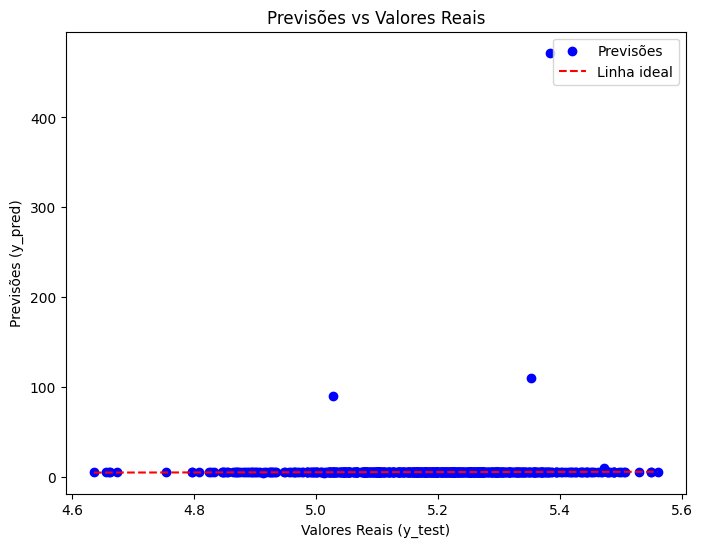

In [31]:
y_pred = reg.predict(X=X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Previsões')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Linha ideal')
plt.title('Previsões vs Valores Reais')
plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Previsões (y_pred)')
plt.legend()
plt.show()

## **VALIDAÇÃO SEM REDUÇÃO DE DIMENSIONALIDADE**
- Resultado não interessante. A complexidade adicionada ao processamento de dados, utilizando o método de PolynomialFeature aumentou exponencialmente a dimensionalidade do dataset. Mostrando a necessidade de uma redução de dimensionalidade, em que aplicamos um PCA com 2 componentes.
- No teste empírico de n° de componentes, percebeu-se que ao aumentar o n° de componentes do PCA, pior o resultado do modelo, e quanto menor, melhor o aprendizado.

In [32]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

R-squared (R²): -16116.69603881389


In [33]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 390.75703329738906


## **TREINAMENTO COM REDUÇÃO DE DIMENSIONALIDADE**

In [34]:
reg = SGDRegressor(fit_intercept=True)
reg = reg.fit(X=X_train_pca, y=y_train)

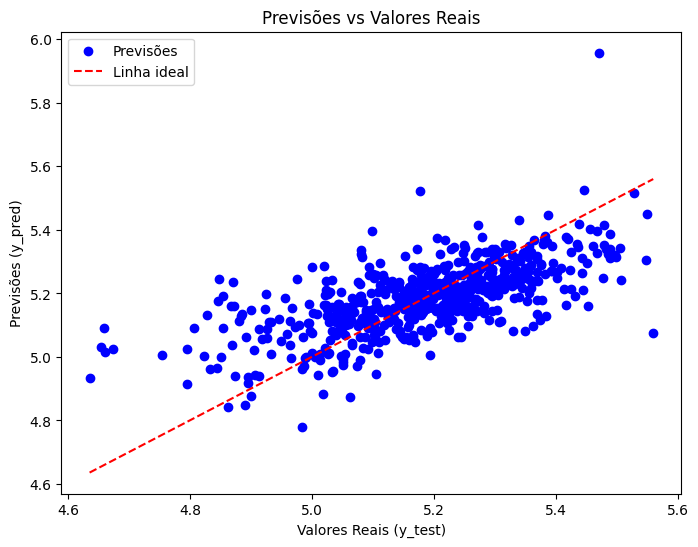

In [35]:
y_pred = reg.predict(X=X_test_pca)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Previsões')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Linha ideal')
plt.title('Previsões vs Valores Reais')
plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Previsões (y_pred)')
plt.legend()
plt.show()

## **VALIDAÇÃO COM REDUÇÃO DE DIMENSIONALIDADE**

In [36]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

R-squared (R²): 0.4338771852009963


In [37]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.013725067842209124
